# Nivell 1
## - Exercici 1
Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".


In [65]:
import numpy as np
from numpy.random import seed, randn
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot


%matplotlib inline 

df=sns.load_dataset('tips')
print(df.columns)


Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [66]:
df.info(verbose=True,show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [67]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [68]:
df.shape

(244, 7)

In [69]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Miramos si hay valores vacios

In [70]:
df.count().sort_values()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [82]:
df[df.columns[df.isnull().sum(axis = 0)>0]].isnull().sum(axis=0)

Series([], dtype: float64)

In [72]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Parece que no ha valores nulos
Miramos los diferentes valores que pueden tomar la variables sobretodo nos interesan la categoricas

In [73]:
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [74]:
for column in ['sex', 'smoker', 'day', 'time', 'size']:
    print(f"{column}: {df[column].unique()}")

sex: ['Female', 'Male']
Categories (2, object): ['Male', 'Female']
smoker: ['No', 'Yes']
Categories (2, object): ['Yes', 'No']
day: ['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
time: ['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']
size: [2 3 4 1 6 5]


Vamos a ver la relacion entre la variables de forma grafica lo mas evidente es entre la propina y el importe de la factura deberia tener una relacion linea

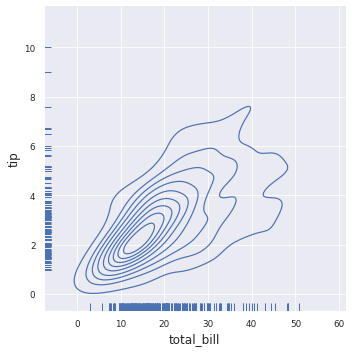

In [75]:
sns.displot(data=df, x="total_bill", y="tip", kind="kde",rug=True)

Podemos ver que mas o menos hay una relacion lineal entre el importe  y la propina aunque hay un claro comportamiento diferencial a partir de las 5 unidades de propina mas o menos 
Vamos a continuar analizando los datos. miraremos la distribuicion de estos por dias, a ver si el numero de datos es aproximadamente el mismo en cada un de los 4 dias 

In [76]:
datos_por_dia=pd.DataFrame(df['day'].value_counts())
datos_por_dia

,day
Sat,87
Sun,76
Thur,62
Fri,19


<AxesSubplot:>

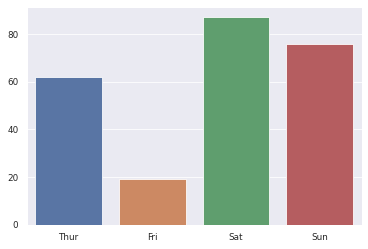

In [77]:
sns.barplot(x=df['day'].value_counts().index,y=df['day'].value_counts().values)

vemos claramente que el numero de entradas del viernes es muy inferio a la del sabado y el domingo. Devemos tener encuenta esto en nuestro analisis, para no caer en suposiciones erroneas como que los viernes se dan menos propinas que los sabados. continuamos con otras relaciones 

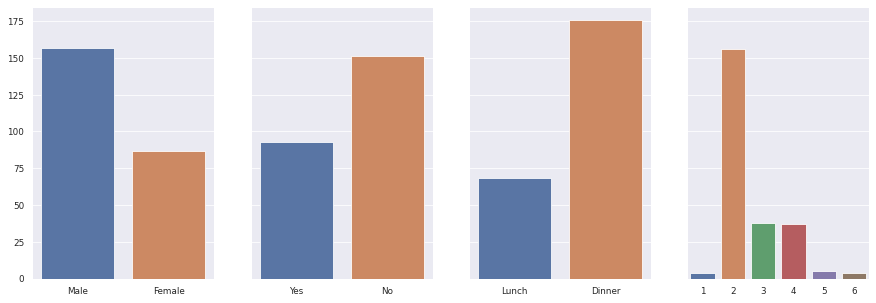

In [78]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
num_column=0
for column in ['sex','smoker','time','size']:    
    sns.barplot(ax=axes[num_column],x=df[column].value_counts().index,y=df[column].value_counts().values)
    num_column+=1


Tambien podemos analizar como se distribuyen las facturas segun su importe, es decir donde se encuentra los importes más frecuentes
vamos a observar la correlacion entre las variables 

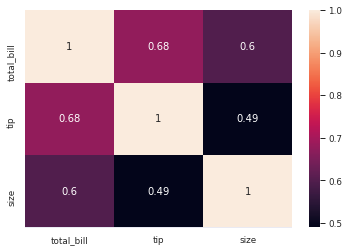

In [79]:
sns.heatmap(df.corr(), annot=True)
plt.show()

parece que hay dos relaciones deviles. el tamaño de la mesa y la factura, la factura y la propina

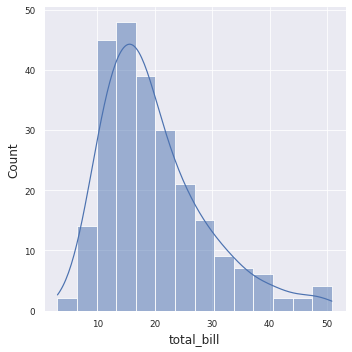

In [80]:
sns.displot(df['total_bill'],kde=True)


In [81]:
Miramos que tal son las propinas por sexo y factura

SyntaxError: invalid syntax. Perhaps you forgot a comma? (31117555.py, line 1)

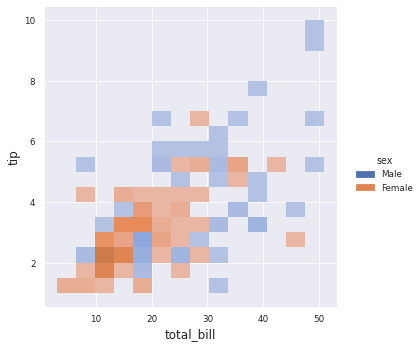

In [ ]:
sns.displot(data=df, x="total_bill", y="tip", hue="sex")

In [ ]:
podemos observar una tendencia a facturas más altas por parte de los hombres al igual que una proporcion más lineal en las propinas. 

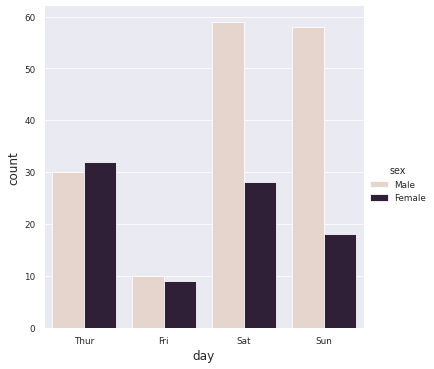

In [102]:
sns.catplot(x='day', data=df, hue='sex', palette='ch:0.1', kind='count')

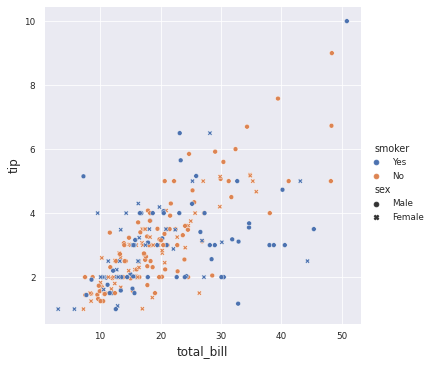

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="sex", data=df )


In [ ]:
en este caso parece que los no fumadores son mas genereos con las propinas y tiene facturas mas altas 

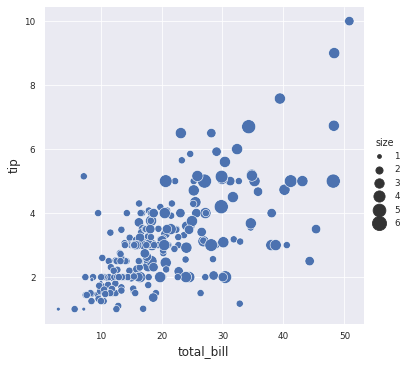

In [ ]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);


In [ ]:
vamos tambien a visulizar la distribucion de los importes de las facturas y las propinas

Text(0.5, 1.0, 'Tip putos anomalos ')

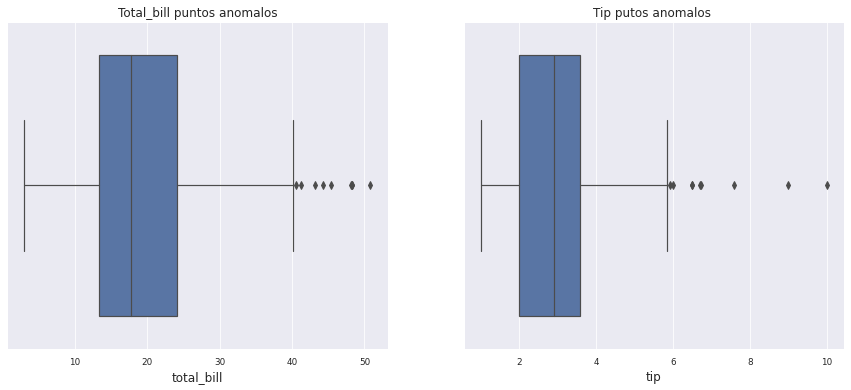

In [103]:
fig, axes = plt.subplots(1, 2,figsize=(15,6)) #
sns.boxplot(data=df,x='total_bill',  ax=axes[0]).set(title='Total_bill puntos anomalos') 
sns.boxplot(data=df,x='tip', ax=axes[1]).set_title('Tip putos anomalos ') 

vamos a calcular algunas relaciones, como, el porcentage de la propina que representa la factura, el porcentage de factura por comensal, y el porcentage 

In [84]:
df['tip_by_bill'] = round(df['tip'] / df['total_bill'] * 100, 2)
df['total_bill_by_person'] = round(df['total_bill'] / df['size'], 2)
df['tip_by_person'] = round(df['tip'] / df['size'], 2)
df.head()




,total_bill,tip,sex,smoker,day,time,size,tip_by_bill,total_bill_by_person,tip_by_person
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94,8.49,0.50
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05,3.45,0.55
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66,7.00,1.17
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98,11.84,1.66
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68,6.15,0.90


In [93]:
average=df.groupby('day')['total_bill','tip'].mean()
sns.

/tmp/ipykernel_63625/654763729.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('day')['total_bill','tip'].mean()


,total_bill,tip
day,,
Thur,17.682742,2.771452
Fri,17.151579,2.734737
Sat,20.441379,2.993103
Sun,21.410000,3.255132


viendo la relacion entre el tamaño y la factura, parece que los tamaños más pequeños tienes facturas más pequeñas, y los más grandes ser organizan al redeor del 30

# Nivell 2
## - Exercici 2
Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat


# Nivell 3
## - Exercici 3
En aquest exercici no us donarem gaires indicacions perquè volem que ens mostreu la vostra creativitat. Sorprèn-me amb gràfiques i interpretacions del dataset "movies.dat" del exercici anterior.